In [1]:
!pip install tensorflow
!pip install keras
!pip install numpy
!pip install matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [3]:
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Dense, Flatten
from keras.applications import VGG16
from keras.callbacks import ModelCheckpoint

In [4]:
# Load CIFAR-10 dataset and normalize the data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

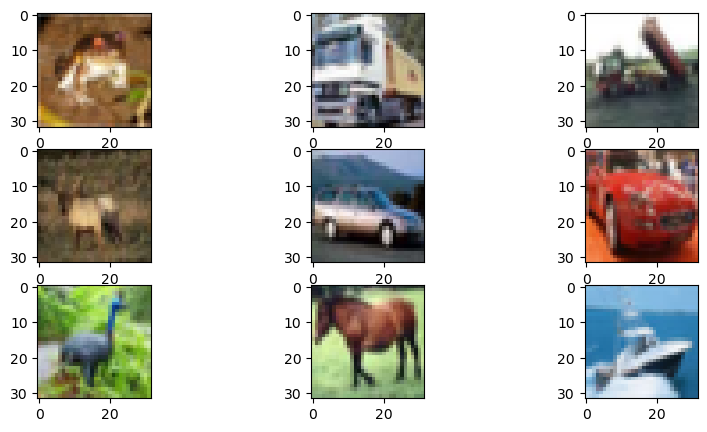

Training data shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


In [5]:
# Display sample images
plt.figure(figsize=(10, 5))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(x_train[i])
plt.show()

print('Training data shape:', x_train.shape)
print('Training labels shape:', y_train.shape)
print('Test data shape:', x_test.shape)
print('Test labels shape:', y_test.shape)

In [6]:
# Implement data augmentation and normalization
datagen_train = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    rescale=1./255.0
)

datagen_test = ImageDataGenerator(rescale=1./255.0)

In [7]:
# Divide the dataset into training, validation, and test sets
train_generator = datagen_train.flow(x_train, y_train, batch_size=32)
validation_generator = datagen_test.flow(x_test, y_test, batch_size=32)

In [8]:
# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
for layer in base_model.layers[:10]:
    layer.trainable = False

In [9]:
# Add custom top layers
x = base_model.output
x = Flatten()(x)
num_classes = 10  # For CIFAR-10
predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
# Train the model with data augmentation
history = model.fit(
    train_generator,
    steps_per_epoch=len(x_train) // 32,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=len(x_test) // 32,
    callbacks=[ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')]
)

Epoch 1/15
1562/1562 [==============================] - 453s 290ms/step - loss: 2.3199 - accuracy: 0.0833 - val_loss: 2.3125 - val_accuracy: 0.0000e+00
Epoch 2/15


/Users/adryannagarcia/anaconda3/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1562/1562 [==============================] - 463s 296ms/step - loss: 2.3126 - accuracy: 0.0807 - val_loss: 2.3075 - val_accuracy: 0.0000e+00
Epoch 3/15
1562/1562 [==============================] - 466s 299ms/step - loss: 2.3107 - accuracy: 0.0833 - val_loss: 2.3081 - val_accuracy: 0.0000e+00
Epoch 4/15
1562/1562 [==============================] - 488s 312ms/step - loss: 2.3101 - accuracy: 0.0833 - val_loss: 2.3062 - val_accuracy: 0.0000e+00
Epoch 5/15
1562/1562 [==============================] - 505s 324ms/step - loss: 2.3095 - accuracy: 0.1108 - val_loss: 2.3069 - val_accuracy: 0.0000e+00
Epoch 6/15
1562/1562 [==============================] - 502s 321ms/step - loss: 2.3081 - accuracy: 0.0788 - val_loss: 2.3120 - val_accuracy: 0.0000e+00
Epoch 7/15
1562/1562 [==============================] - 491s 315ms/step - loss: 2.3079 - accuracy: 0.0922 - val_loss: 2.3057 - val_accuracy: 1.0000
Epoch 8/15
1562/1562 [==============================] - 495s 317ms/step - loss: 2.3069 - accuracy: 0.10

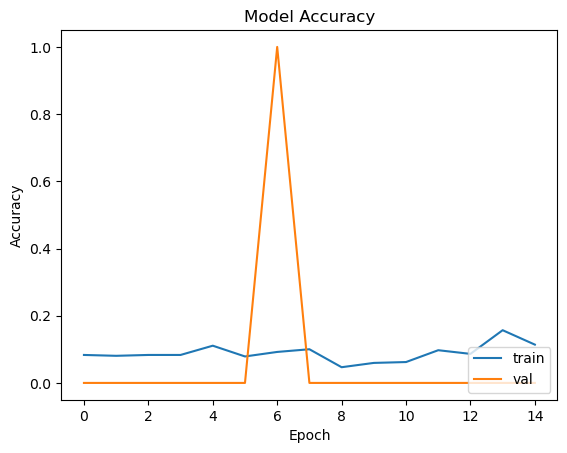

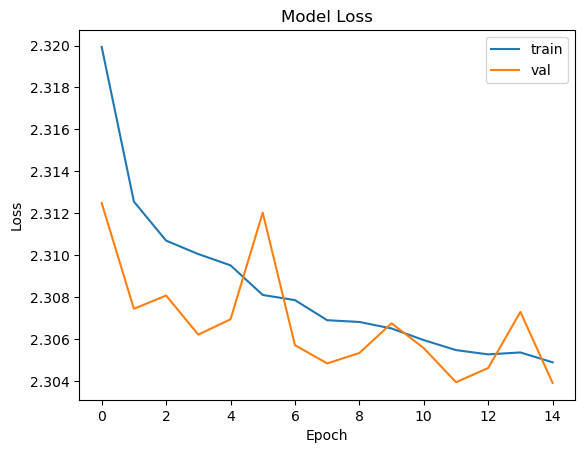

In [11]:
# Plot accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='lower right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
plt.show()

In [12]:
# Evaluate the best model on the test set
best_model = tf.keras.models.load_model('best_model.h5')
test_loss, test_acc = best_model.evaluate(x_test, y_test)

print('Test Loss:', test_loss)
print('Test Accuracy:', test_acc)

313/313 [==============================] - 29s 91ms/step - loss: 2.3049 - accuracy: 0.0672
Test Loss: 2.304880142211914
Test Accuracy: 0.06719999760389328
